In [415]:
import pandas as pd
import sys
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.insert(0, '../../')

# read in data

In [437]:
original_df = pd.read_csv('../../data/imbalance_data/cleaned_08-01-2020_22_15_47 - 08-01-2020_22_15_47_delta_data.csv')

In [438]:
original_df.shape

(1760, 35)

In [439]:
original_df.columns

Index(['symbol', 'currentvolume', 'lastprice', 'nbb', 'nbo', 'imbside',
       'imbalancesize', 'notional_imbalance', 'imbalancetype', 'matchedsize',
       'currentreferenceprice', 'nearindicativeprice', 'farindicativeprice',
       'matched_to_unmatched', 'close', 'pct_move_snapshot_to_close', 'minute',
       'day', 'quarter', 'year', 'week', 'month', 'diff_notional_imbalance',
       'diff_lastprice', 'diff_nbb', 'diff_nbo', 'diff_imbalancesize',
       'diff_matchedsize', 'diff_currentreferenceprice',
       'diff_nearindicativeprice', 'diff_farindicativeprice',
       'diff_matched_to_unmatched', 'diff_currentvolume', 'diff_imbside',
       'lastprice_unnormalized'],
      dtype='object')

In [440]:
p_and_l_df = original_df[['close', 'lastprice_unnormalized']] # use this for p&l

In [441]:
imbal_train_df = original_df.loc[:, (original_df.columns!='close') &  (original_df.columns!='lastprice_unnormalized') ]

In [442]:
imbal_train_df.columns

Index(['symbol', 'currentvolume', 'lastprice', 'nbb', 'nbo', 'imbside',
       'imbalancesize', 'notional_imbalance', 'imbalancetype', 'matchedsize',
       'currentreferenceprice', 'nearindicativeprice', 'farindicativeprice',
       'matched_to_unmatched', 'pct_move_snapshot_to_close', 'minute', 'day',
       'quarter', 'year', 'week', 'month', 'diff_notional_imbalance',
       'diff_lastprice', 'diff_nbb', 'diff_nbo', 'diff_imbalancesize',
       'diff_matchedsize', 'diff_currentreferenceprice',
       'diff_nearindicativeprice', 'diff_farindicativeprice',
       'diff_matched_to_unmatched', 'diff_currentvolume', 'diff_imbside'],
      dtype='object')

In [443]:
imbal_train_df.columns

Index(['symbol', 'currentvolume', 'lastprice', 'nbb', 'nbo', 'imbside',
       'imbalancesize', 'notional_imbalance', 'imbalancetype', 'matchedsize',
       'currentreferenceprice', 'nearindicativeprice', 'farindicativeprice',
       'matched_to_unmatched', 'pct_move_snapshot_to_close', 'minute', 'day',
       'quarter', 'year', 'week', 'month', 'diff_notional_imbalance',
       'diff_lastprice', 'diff_nbb', 'diff_nbo', 'diff_imbalancesize',
       'diff_matchedsize', 'diff_currentreferenceprice',
       'diff_nearindicativeprice', 'diff_farindicativeprice',
       'diff_matched_to_unmatched', 'diff_currentvolume', 'diff_imbside'],
      dtype='object')

# take top cols 
- Need to run all cells first

In [444]:
cols_to_select = list(imbal_train_X.columns[np.array(lr.coef_ > .00005).ravel()])

In [445]:
cols_to_select.append('pct_move_snapshot_to_close')

In [446]:
cols_to_select

['imbalancesize',
 'nearindicativeprice',
 'day',
 'year',
 'month',
 'diff_notional_imbalance',
 'pct_move_snapshot_to_close']

In [447]:
smaller_imbal_train_df = imbal_train_df.loc[:,imbal_train_df.columns.isin(cols_to_select)]

In [448]:
imbal_train_df

,symbol,currentvolume,lastprice,nbb,nbo,imbside,imbalancesize,notional_imbalance,imbalancetype,matchedsize,...,diff_nbb,diff_nbo,diff_imbalancesize,diff_matchedsize,diff_currentreferenceprice,diff_nearindicativeprice,diff_farindicativeprice,diff_matched_to_unmatched,diff_currentvolume,diff_imbside
0,-1.538079,0.886295,0.699133,0.699948,0.698569,-0.981981,0.491638,2.256053,-0.558100,0.509616,...,0.002891,0.002915,-0.053197,0.174144,0.003052,0.271004,1.812046,-0.027877,0.035987,0.009764
1,-1.538079,2.025753,0.835207,0.835838,0.834561,-0.981981,1.267741,5.276323,-0.558100,3.649026,...,0.000923,0.001370,-0.995831,1.215266,0.001647,0.292695,-0.042973,-0.063185,0.084205,-1.708753
2,-1.538079,3.055525,0.935039,0.935724,0.934333,-0.981981,2.111664,8.844413,-0.558100,9.169271,...,0.002188,0.002493,-2.131775,1.857122,0.002630,0.312145,2.083627,-0.040997,0.309204,0.009764
3,-1.538079,1.679079,1.095473,1.096330,1.094584,1.018350,1.720048,8.099328,-0.558100,5.002506,...,-0.002593,-0.002422,-2.212632,1.505580,-0.002429,0.341747,2.263120,-0.088007,0.077177,0.009764
4,-1.538079,4.183423,1.043744,1.044334,1.042904,-0.981981,1.885163,8.528484,-0.558100,4.468395,...,0.013156,0.013869,-1.168436,1.367468,0.013592,0.347350,-0.042973,-0.062511,0.352114,0.009764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1.761604,-0.445549,-0.080383,-0.081015,-0.080391,1.018350,-0.280216,-0.295383,-0.558100,-0.411096,...,0.343742,0.345023,-0.060096,-0.062439,0.344984,0.024004,0.192033,-0.006677,-0.085719,1.728282
1756,1.764943,-0.414294,-0.497108,-0.497495,-0.497163,1.018350,0.173666,-0.080606,1.791794,-0.380538,...,-0.682044,-0.683409,0.438834,0.014924,-0.683903,-0.138187,-0.837795,0.783312,0.026551,0.009764
1757,1.768283,-0.261411,-0.563008,-0.563259,-0.562938,-0.981981,0.175082,-0.151701,1.791794,-0.016464,...,-0.107351,-0.106909,0.110582,0.292324,-0.107131,-0.054666,-0.042973,-0.201040,0.168788,-1.708753
1758,1.771623,-0.198258,-0.590146,-0.590283,-0.590102,-0.981981,0.406201,-0.111838,1.791794,-0.116581,...,-0.046183,-0.045958,0.370607,-0.245378,-0.046137,-0.044983,-0.250332,0.193955,0.051695,0.009764


# split into x and y

In [470]:
imbal_train_X = imbal_train_df.loc[:, imbal_train_df.columns != 'pct_move_snapshot_to_close']
imbal_train_y = imbal_train_df.loc[:, imbal_train_df.columns == 'pct_move_snapshot_to_close']

In [471]:
# imbal_train_X = smaller_imbal_train_df.loc[:, smaller_imbal_train_df.columns != 'pct_move_snapshot_to_close']
# imbal_train_y = smaller_imbal_train_df.loc[:, smaller_imbal_train_df.columns == 'pct_move_snapshot_to_close']

 # Train a model

In [472]:
mae = []
mae_above_threshold = []
mae_positive_predictions = []
mae_negative_predictions= [] 
n_correct_signs=[]

n_correct_sign_and_more_extreme_predictions = []
n_correct_sign_and_threshold = []
total_delta_close_last = []
len_correct=[]
threshold = .10
cv = 120

position_size_in_dollars=100_000
cost_per_1k_shares_entry_and_exit=6
# How much does it cost per share?
# $6 per 1k shares on entry and exit

for i in range(cv):
    if i % 20 == 0:
        print(f"PCT finished = {i/cv:.2%}")
    lr =LinearRegression()
    X_train, X_test, y_train, y_test  = train_test_split(imbal_train_X, imbal_train_y, test_size=0.15) # RandomForestRegressor(n_jobs=-1) #ain, X_test, y_train, y_test  = train_test_split(imbal_train_X, imbal_train_y, test_size=0.10)
    p_and_l_test_df = X_test.join(p_and_l_df)
    
    
    lr.fit(X_train, y_train )

    test_predictions = lr.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions) )

    # what about more extreme predicitons, above threshold
    threshold_mask = np.abs(test_predictions) > threshold
    threshold_test_predictions = test_predictions[threshold_mask]
    threshold_y_test = y_test[threshold_mask]
    mae_above_threshold.append(mean_absolute_error(threshold_y_test, threshold_test_predictions))

    # are we better at positive or negative predictions?
    positive_mask = np.sign(test_predictions) == 1
    positive_predictions = test_predictions[positive_mask]
    positive_y_test = y_test[positive_mask]
    mae_positive_predictions.append(mean_absolute_error(positive_y_test, positive_predictions))

    negative_predictions = test_predictions[np.sign(test_predictions) == -1]
    negative_y_test = y_test[np.sign(test_predictions) == -1]
    mae_negative_predictions.append(mean_absolute_error(negative_y_test, negative_predictions))

    # sign of prediction and more extreme signs
    len_correct.append(len(y_test))
    n_sign_and_extreme = []
    n_sign = []
    n_sign_and_threshold = []
    delta_close_last_array = []
    
    start_prices_running_sum = 0
    end_prices_running_sum = 0 # this should be higher
    
    prediction_index = 0
    for pred_, true_ in zip(test_predictions, np.array(y_test).ravel()):

        if (np.sign(pred_) == np.sign(true_) ) and (np.abs(true_) > np.abs(pred_)):
            n_sign_and_extreme.append(1)
        if (np.sign(pred_) == np.sign(true_) ) :
            n_sign.append(1)
        if (np.abs(pred_) > threshold) and (np.sign(pred_) == np.sign(true_) ) : 
            n_sign_and_threshold.append(1)
            
        if (np.abs(pred_) > threshold): ## get into a position here
            stock_direction_pred = np.sign(pred_) # direction stock is going to move
            
            # calculate P & l
            last_price =  p_and_l_test_df.iloc[prediction_index, :]['lastprice_unnormalized']
            
            close_price = p_and_l_test_df.iloc[prediction_index, :]['close']
            
            if stock_direction_pred > 0: # going up
                delta_close_last_pct = (close_price - last_price) / close_price
                start_prices_running_sum += last_price 
                end_prices_running_sum += close_price
                
                if (prediction_index % 500 == 0) and (i % 20 == 0):
                    print('going up')
                    print('delta_close_last_pct=',delta_close_last_pct)
                    print('last_price=',last_price)
                    print('close_price=', close_price)
                    print('prediction_index=',prediction_index)
                    print(' ')

            
            else: # going down
                delta_close_last_pct = (last_price - close_price ) / last_price
                start_prices_running_sum += close_price 
                end_prices_running_sum += last_price
                
                if (prediction_index % 500 == 0) and (i % 20 == 0):
                    print('prediction', pred_)
                    print('going down')
                    print('delta_close_last_pct=',delta_close_last_pct)
                    print('last_price=',last_price)
                    print('close_price=', close_price)
                    print('prediction_index=',prediction_index)
                    print(' ')

            delta_close_last_array.append(delta_close_last_pct)
                
            
        prediction_index += 1
            
            
            
                
    n_correct_sign_and_more_extreme_predictions.append(np.sum(n_sign_and_extreme))
    n_correct_signs.append(np.sum(n_sign))
    n_correct_sign_and_threshold.append(np.sum(n_sign_and_threshold))
    total_delta_close_last.append(np.median(delta_close_last_array))



PCT finished = 0.00%
going up
delta_close_last_pct= 0.004212454212454285
last_price= 54.37
close_price= 54.6
prediction_index= 0
 
PCT finished = 16.67%
prediction [-0.94280754]
going down
delta_close_last_pct= 0.0002493114255865186
last_price= 842.32
close_price= 842.11
prediction_index= 0
 
PCT finished = 33.33%
prediction [-0.29109179]
going down
delta_close_last_pct= 0.0011184788687385201
last_price= 125.17
close_price= 125.03
prediction_index= 0
 
PCT finished = 50.00%
PCT finished = 66.67%
prediction [-0.50933801]
going down
delta_close_last_pct= 0.0026558073654390684
last_price= 56.48
close_price= 56.33
prediction_index= 0
 
PCT finished = 83.33%


In [473]:
print(f"median mae for negative predictions = {np.median(mae_negative_predictions):.2%}")
print(f"median mae for positive predictions = {np.median(mae_positive_predictions):.2%}") # slightly better as positive predictions
print(f"median MAE with threshold predictions = {np.median(mae_above_threshold):.2%}")
print(f"median MAE with all data is {np.median(mae):.2%}")
print(f"pct of the time we guess the corect sign (up or down) all data is {np.sum(n_correct_signs)/np.sum(len_correct):.2%}")
print(f"pct of the time we guess the corect sign (up or down) all data and the true data is more extreme {np.sum(n_correct_sign_and_more_extreme_predictions)/np.sum(len_correct):.2%}")
print(f"pct of the time we guess the corect sign (up or down) and the prediction is more extreme than our threshold \
    of {threshold} =  {np.sum(n_correct_sign_and_threshold)/np.sum(len_correct):.2%}")
print(f"The expected profit in pct per dollar  put in is {(end_prices_running_sum / start_prices_running_sum) -1:.6%}")


median mae for negative predictions = 30.93%
median mae for positive predictions = 30.47%
median MAE with threshold predictions = 33.14%
median MAE with all data is 31.02%
pct of the time we guess the corect sign (up or down) all data is 58.97%
pct of the time we guess the corect sign (up or down) all data and the true data is more extreme 31.89%
pct of the time we guess the corect sign (up or down) and the prediction is more extreme than our threshold     of 0.1 =  44.18%
The expected profit in pct per dollar  put in is 0.102643%


# test predictions

In [430]:
N = 30
for test, true in zip(test_predictions.ravel()[:N], np.array(y_test).ravel()[:N]):
    print(' ')
    print('True move = ', true)
    print('Predicted move =', test)

 
True move =  -0.1
Predicted move = 0.10500282544285255
 
True move =  -0.09
Predicted move = -0.09151975112445143
 
True move =  0.13
Predicted move = 0.10147086601500632
 
True move =  0.14
Predicted move = 0.29064140666491767
 
True move =  0.05
Predicted move = 0.19102376707382973
 
True move =  0.15
Predicted move = 0.026703529762698963
 
True move =  -0.43
Predicted move = -0.06928871033142059
 
True move =  0.33
Predicted move = 0.24343820183730713
 
True move =  -0.16
Predicted move = -0.6486299498210428
 
True move =  0.26
Predicted move = 0.06750266503604507
 
True move =  -0.08
Predicted move = 0.31358703241426156
 
True move =  -0.27
Predicted move = -0.11974954674133187
 
True move =  0.02
Predicted move = 0.1180511946236038
 
True move =  -0.04
Predicted move = -0.09465367362486177
 
True move =  -0.11
Predicted move = 0.05691409807195669
 
True move =  -0.28
Predicted move = 0.025822521360623796
 
True move =  -0.07
Predicted move = 0.38545796179801073
 
True move =  0.

# Threshold predictions

In [431]:
# Threshold predictions
N = 30
for test, true in zip(test_predictions[threshold_mask].ravel()[:N], np.array(y_test)[threshold_mask].ravel()[:N]):
    print(' ')
    print('True move = ', true)
    print('Predicted move =', test)

 
True move =  -0.1
Predicted move = 0.10500282544285255
 
True move =  0.13
Predicted move = 0.10147086601500632
 
True move =  0.14
Predicted move = 0.29064140666491767
 
True move =  0.05
Predicted move = 0.19102376707382973
 
True move =  0.33
Predicted move = 0.24343820183730713
 
True move =  -0.16
Predicted move = -0.6486299498210428
 
True move =  -0.08
Predicted move = 0.31358703241426156
 
True move =  -0.27
Predicted move = -0.11974954674133187
 
True move =  0.02
Predicted move = 0.1180511946236038
 
True move =  -0.07
Predicted move = 0.38545796179801073
 
True move =  0.12
Predicted move = 0.10384225231814526
 
True move =  0.02
Predicted move = -0.6070826015004513
 
True move =  -0.02
Predicted move = 0.23906832855755056
 
True move =  -0.9
Predicted move = -0.17242958680458287
 
True move =  0.12
Predicted move = 0.20941003933876345
 
True move =  0.0
Predicted move = 0.1687452143826249
 
True move =  -0.11
Predicted move = -0.4293061089181265
 
True move =  -0.18
Predi

# Coefficients

In [432]:
X_train.columns[np.array(lr.coef_ > .0005).ravel()]

Index(['lastprice', 'nbo', 'day', 'quarter', 'year', 'month', 'diff_nbb',
       'diff_nbo', 'diff_currentreferenceprice'],
      dtype='object')

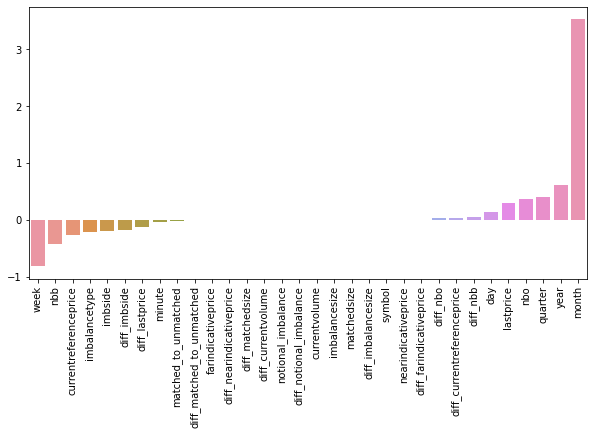

In [433]:
plt.figure(figsize=(10,5))
sns.barplot(x = X_train.columns[np.argsort(lr.coef_).ravel()], y = lr.coef_.ravel()[np.argsort(lr.coef_).ravel()])
plt.xticks(rotation=90) ;